# Group By Exercise

**This exercise uses the `laliga.csv` dataset**

## Part 1

In [1]:
#Find the 5 teams that had the most "Red Cards"
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/laliga.csv")
df.head()

,Team,Position,Shirt number,Name,Minutes played,Games played,Percentage of games played,Full games played,Percentage of full games played,Games started,...,Corners,Tackles.1,Duels,Man-to-man duels,Aerial duels,Passes,Short passes,Long passes,Through balls,Goals scored per attempt
0,Athletic Club,Goalkeeper,NaN,Hodei Oleaga,0.000,0,0.00%,0,0.00%,0,...,0,0,0,0,0,0.0,0.0,0,0,0
1,Athletic Club,Goalkeeper,1.0,A. Remiro,0.000,0,0.00%,0,0.00%,0,...,0,0,0,0,0,0.0,0.0,0,0,0
2,Athletic Club,Goalkeeper,13.0,Herrerín,2.790,31,82.00%,31,82.00%,31,...,0,0,25,6,19,887.0,128.0,759,1,0
3,Athletic Club,Goalkeeper,25.0,Unai Simón,630.000,7,18.00%,7,18.00%,7,...,0,0,3,2,1,155.0,49.0,106,0,0
4,Athletic Club,Defender,3.0,Núñez,1.063,12,32.00%,11,29.00%,11,...,0,15,107,38,69,536.0,457.0,78,1,0


In [3]:
df.columns

Index(['Team', 'Position', 'Shirt number', 'Name', 'Minutes played',
       'Games played', 'Percentage of games played', 'Full games played',
       'Percentage of full games played', 'Games started',
       'Percentage of games started', 'Games where substituted',
       'Percentage of games where substituted', 'Yellow Cards', 'Red Cards',
       'Second Yellows', 'Goals scored', 'Penalties scored', 'Own goals',
       'Goals conceded while player on pitch', 'Tackles', 'Interceptions',
       'Recoveries', 'Clearances', 'Successful tackles',
       'Unssuccessful tackles', 'Last man', 'Successful duels', 'Duels lost',
       'Successful aerial challenges', 'Unsuccessful aerial challenges',
       'Offsides', 'Fouls suffered', 'Fouls committed', 'Penalties won',
       'Penalties given away', 'Handballs committed',
       'Fouls committed per card', 'Shots', 'Shots on target', 'Assists',
       'Successful dribbles', 'Unsuccessful dribbles', 'Goals scored.1',
       'From inside the a

In [4]:
gbo = df.groupby(by = ["Team"])
gbo

In [5]:
gbo["Red Cards"].sum().nlargest(5)

Team
Rayo Vallecano    8
Levante UD        7
Getafe CF         6
RC Celta          6
Real Madrid       6
Name: Red Cards, dtype: int64

In [6]:
# Find the average number of "Long passes" made by each Position (Goalkeeper, Forward, etc.)

In [7]:
gbo1 = df.groupby("Position")
gbo1

In [8]:
gbo1["Long passes"].mean()

Position
Defender      102.610811
Forward        23.787234
Goalkeeper    242.157895
Midfielder     60.445455
Name: Long passes, dtype: float64

In [9]:
#Find the 10 Shirt numbers that scored the most goals
gbo2 = df.groupby(by = "Shirt number")
gbo2

In [10]:
gbo2["Goals scored"].sum().nlargest(10)

Shirt number
9.0     169
10.0    117
7.0     101
19.0     69
11.0     56
22.0     47
12.0     45
17.0     38
23.0     27
8.0      23
Name: Goals scored, dtype: int64

## Part 2

**Use `agg` to create a dataframe that contains:**
* A `total` column containing the total "Shots" taken by each team
* A `on_target` column containing the total "Shots on target" taken by each team
* It should look like the following dataframe (but for all teams in the dataset):

| Team   | total | on_target |
| ----------- | ----------- | ----------- |
| **Real Betis** | 300      |158
| **Levante UD** | 314      |157

In [11]:
new_df = df.groupby(by = "Team").agg(total=("Shots", "sum"), on_target=("Shots on target", "sum"))
new_df

,total,on_target
Team,,
Athletic Club,332,151
Atlético de Madrid,339,159
CD Leganés,334,132
D. Alavés,299,109
FC Barcelona,445,249
Getafe CF,283,121
Girona FC,324,147
Levante UD,314,157
R. Valladolid CF,319,131


In [12]:
new_df["on_target_percentage"] = round((new_df["on_target"]/new_df["total"]),2)
new_df

,total,on_target,on_target_percentage
Team,,,
Athletic Club,332,151,0.45
Atlético de Madrid,339,159,0.47
CD Leganés,334,132,0.40
D. Alavés,299,109,0.36
FC Barcelona,445,249,0.56
Getafe CF,283,121,0.43
Girona FC,324,147,0.45
Levante UD,314,157,0.50
R. Valladolid CF,319,131,0.41


Use the dataframe from above to create the following figure:

* Notice the layout (2 rows by 1 column)
* The top chart shows the top 5 most accurate teams (highest on-target shot pecentage)
* The bottom chart shows the 5 least accurate teams (lowest on-target shot pecentage)
* Both plots share the same x-axis
* Notice how the data is sorted within each plot!


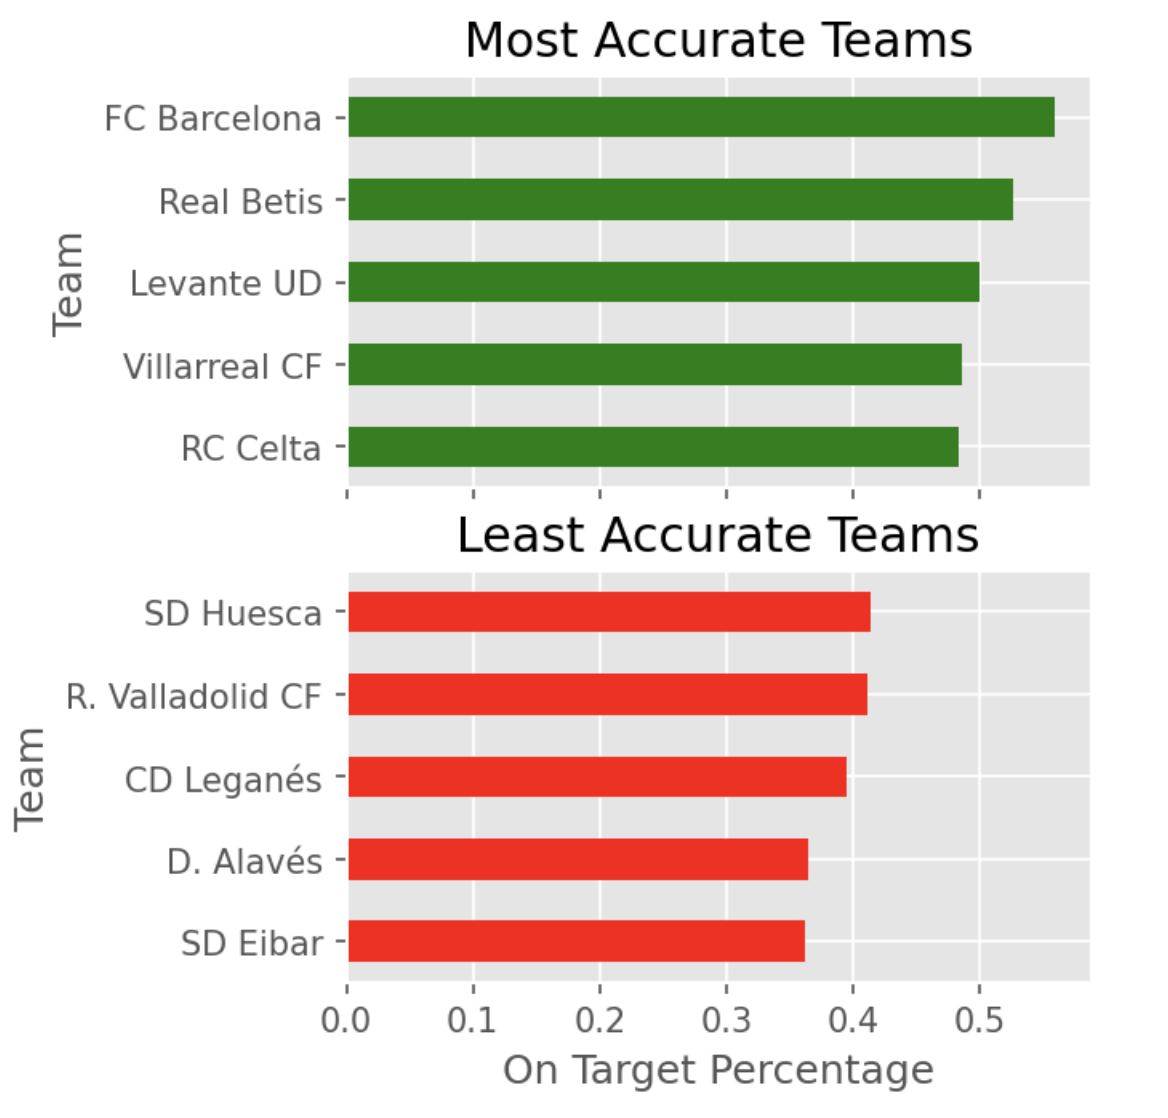

In [13]:
five_accurate = new_df["on_target_percentage"].nlargest(5).sort_values()
five_accurate


Team
RC Celta         0.48
Villarreal CF    0.49
Levante UD       0.50
Real Betis       0.53
FC Barcelona     0.56
Name: on_target_percentage, dtype: float64

In [14]:
least_accurate = new_df["on_target_percentage"].nsmallest(5)
least_accurate

Team
D. Alavés           0.36
SD Eibar            0.36
CD Leganés          0.40
R. Valladolid CF    0.41
SD Huesca           0.41
Name: on_target_percentage, dtype: float64

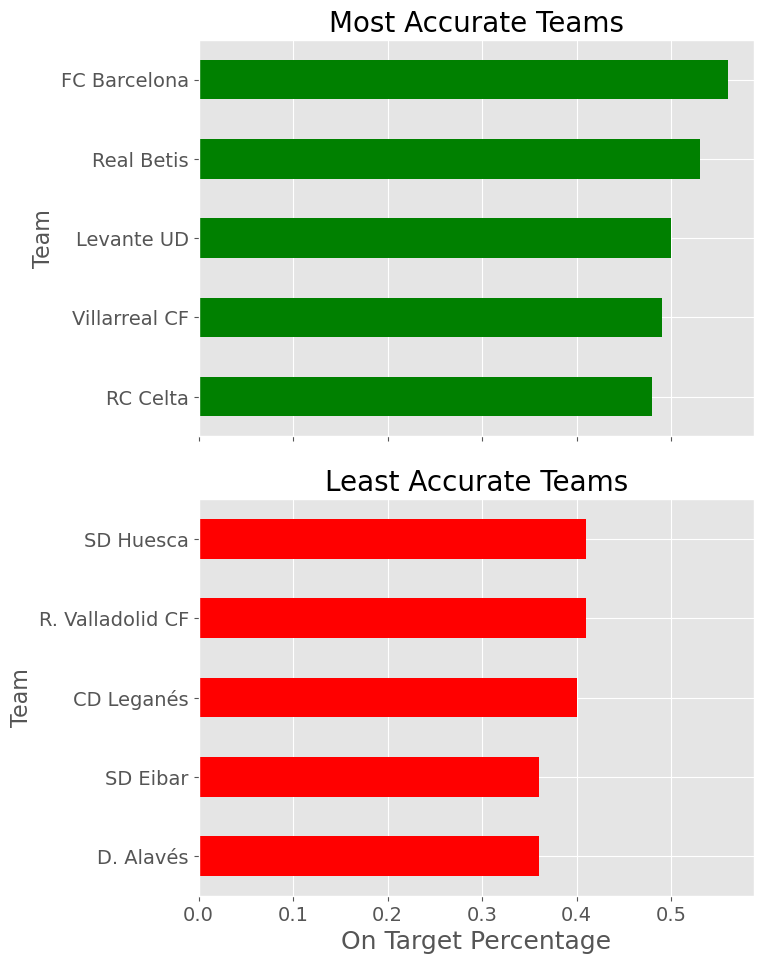

In [15]:
plt.style.use('ggplot')
fig, axs = plt.subplots(2,1, figsize = (8, 10), sharex = True)
five_accurate.plot(kind="barh", ax=axs[0], color="green", fontsize = 14)
axs[0].set_title("Most Accurate Teams", fontsize = 20)
axs[0].set_ylabel("Team", fontsize = 16)
least_accurate.plot(kind="barh", ax=axs[1], color="red", fontsize = 14)
axs[1].set_title("Least Accurate Teams", fontsize = 20)
axs[1].set_ylabel("Team", fontsize = 16)
plt.xlabel("On Target Percentage", fontsize = 18)
axs = plt.tight_layout(pad = 2)